### Introduction 

Aerofit, a prominent brand in fitness equipment, offers a diverse range of products, including treadmills, exercise bikes, gym machines, and fitness accessories, designed to meet the needs of a wide audience. To enhance product recommendations for new customers, the market research team at Aerofit is analyzing customer characteristics to identify target audiences for each type of treadmill, aiming to uncover any significant differences among product users.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from  matplotlib import pyplot as plt

In [4]:
df=pd.read_csv("/Users/karan/Downloads/aerofit_treadmill.txt")

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.shape

(180, 9)

There are total 180 rows and 9 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


we can clearly see that there are no missing values and only Product,Gender,MaritalStatus is having an object datatype.

In [10]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

From the above inference, we can say that there are three different types of products. which are 'KP281', 'KP481', 'KP781'.

The price for the 'KP281' is $1,500  which is more like a economical model.
The price for the 'KP481' is $1,750  which is more like a mid-price range model.
The price for the 'KP781' is $2,500  which is more like a top-tier category with advanced features range model.

In [12]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


we can clearly see that mostly the age of the people is between 18 and 33 years.However, there are also people who are around 50 years old.

In [14]:
df.describe(include="object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107



Out of a total of 180 purchasers, the data clearly indicates that men are purchasing more frequently than women. Additionally, married individuals are making more purchases compared to singles in this dataset.

### Let's check the outliers for Income.

<Axes: xlabel='Income'>

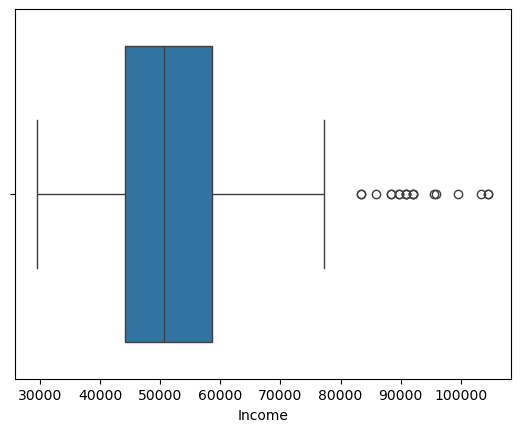

In [17]:
sns.boxplot(x=df['Income'])

We can clearly say that the majority of people have an income between 45,000 and 58,000, but there are also those who have a very high income, more than 85,000.

<Axes: xlabel='Miles'>

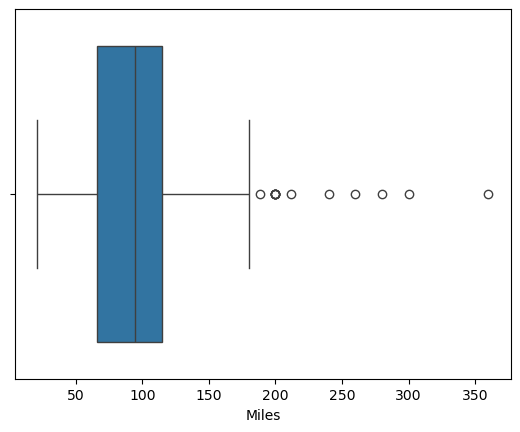

In [19]:
sns.boxplot(x=df['Miles'])

Most people expect to walk or run 55 to 125 miles per week. But there are also people with very high expectations who want to walk more than 200 miles.

In [21]:
df['Product'].value_counts(normalize=True)*100

Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64

It is evident that the 'KP281' model is the most popular choice, accounting for over 44% of total sales. Followed by 'KP481' and 'KP781' with 33.33 % and 22.22 % respectively.    

<Axes: xlabel='Gender', ylabel='Income'>

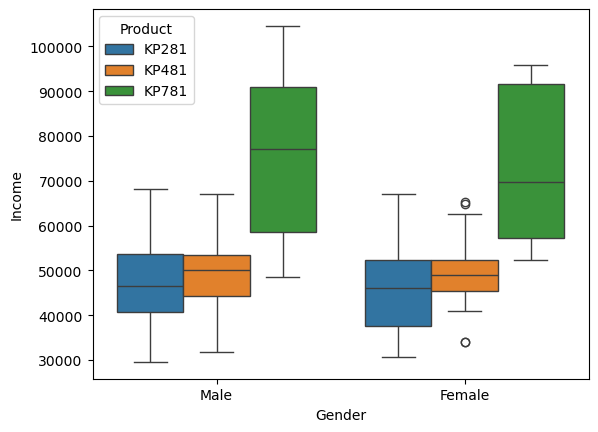

In [23]:
sns.boxplot(x="Gender",y="Income",hue="Product",data=df)

With respect to the above analysis, we can say that among those who are buying the product "KP781," men have a higher income than women.

<Axes: xlabel='Product', ylabel='Income'>

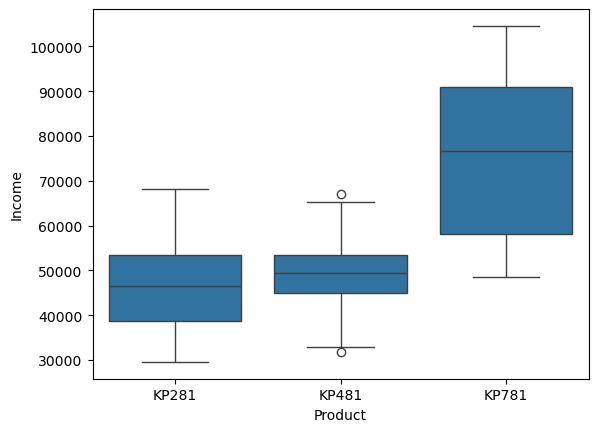

In [25]:
sns.boxplot(x='Product',y='Income',data=df)

We can see that people who are buying products 'KP281' and 'KP481' have almost the same mean income. But the people who are buying product 'KP781' have very high incomes.

In [27]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<Axes: xlabel='MaritalStatus', ylabel='Income'>

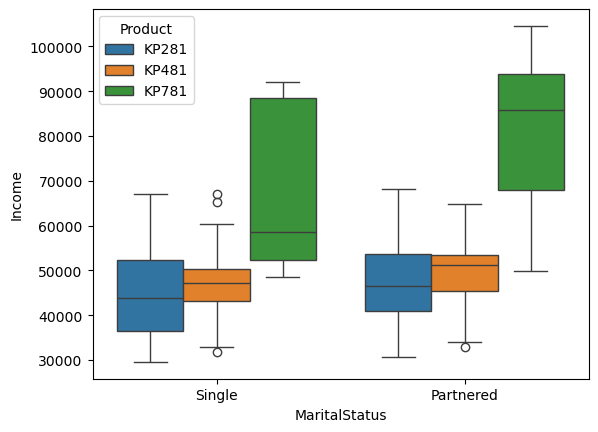

In [28]:
sns.boxplot(x="MaritalStatus",y='Income',hue='Product',data=df)


The analysis clearly indicates that among purchasers of the "KP781" model, partnered individuals have significantly higher incomes compared to single individuals purchasing the same product

<Axes: xlabel='MaritalStatus', ylabel='count'>

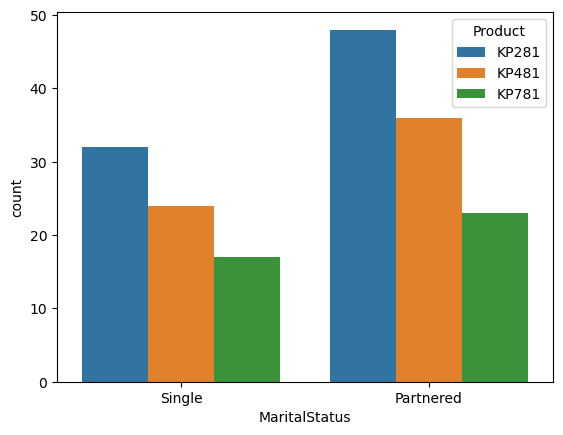

In [30]:
sns.countplot(x="MaritalStatus",hue='Product',data=df)

Regardless of marital status, the most economical model, "KP281," is the highest-selling product. However, compared to single individuals, married people have made purchases across all product categories.

In [32]:
income_count=df.groupby("MaritalStatus")['Income'].mean()
income_count

MaritalStatus
Partnered    55763.000000
Single       50724.424658
Name: Income, dtype: float64

We can clearly see that married people have more income than single people. 

<Axes: xlabel='Gender', ylabel='count'>

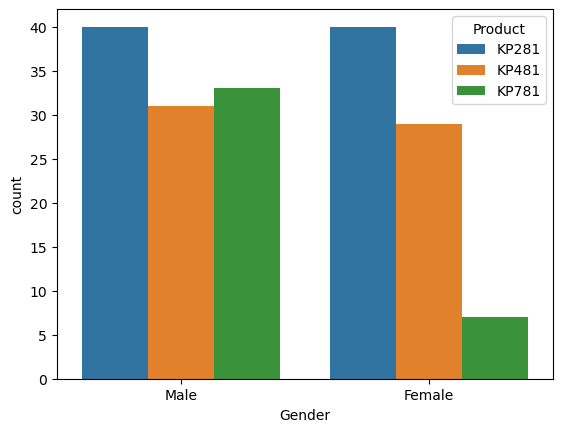

In [34]:
sns.countplot(x="Gender",hue='Product',data=df)


<Axes: xlabel='Age'>

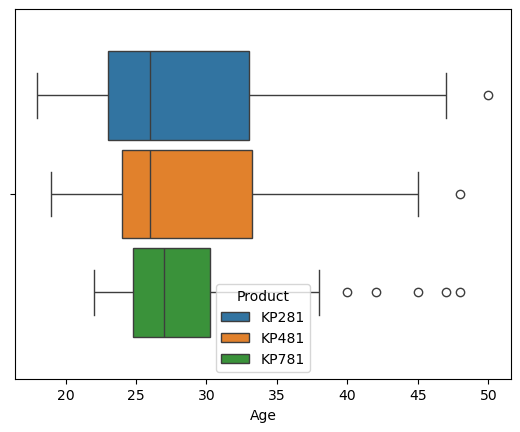

In [36]:
sns.boxplot(x="Age",hue='Product',data=df,gap=0.1)


The analysis reveals that the most expensive treadmill model is predominantly purchased by individuals aged 25 to 30. However, it's noteworthy that older customers also show interest in this top-tier product, indicating its appeal across different age groups. On the other hand, when examining the overall age distribution across all product categories, the mean age falls between 23 and 25 years. This suggests that younger customers, who are likely more health-conscious and tech-savvy, are a significant segment of the market, driving purchases across the entire range of treadmill models.

<Axes: xlabel='Product', ylabel='Miles'>

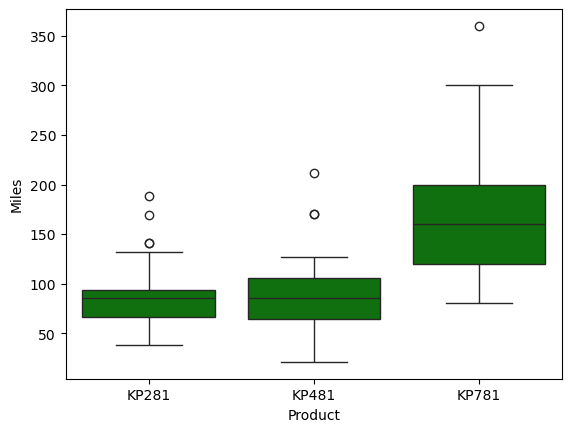

In [38]:
sns.boxplot(x='Product',y='Miles',data=df,color='green')

This demonstrates that consumers who buy the most expensive product tend to walk/run more miles per week.However, there is not a major difference between the entry level product and the mid-tier product in terms of weeks per mile.

In [76]:
corr_column=df.drop(columns=['MaritalStatus','Gender','Product'],axis=1)

<Axes: >

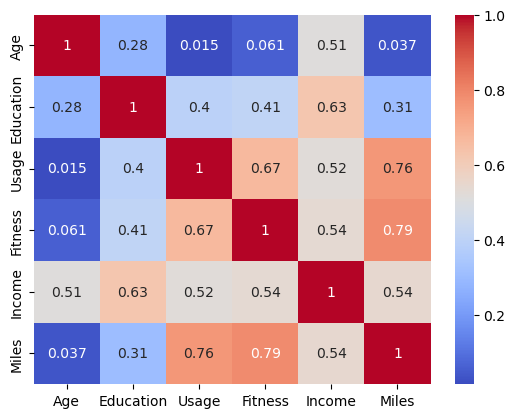

In [100]:
sns.heatmap(corr_column.corr(),annot=True,cmap='coolwarm')

1)Strong Correlation Between Fitness and Miles:
Our analysis reveals a significant correlation between fitness levels and the number of miles walked or run. Simply put, the more a person walks or runs, the better their fitness tends to be.

2)Usage Frequency Tied to Fitness and Mileage:
The frequency of usage, or how often a client plans to use their fitness equipment weekly, is closely linked to both the miles they cover and their overall fitness.

3)Income Linked to Age and Experience:
We observe that individuals with greater age and experience generally tend to have higher income levels, which is an important demographic insight.

4)Education's Impact on Income:
There's a strong correlation between income and education, reinforcing that higher educational attainment often leads to increased earnings.

5)Income Influences Activity Levels:
Those with higher incomes are more likely to engage in physical activities, reflected in the higher miles they walk or run.

6)Age Has Minimal Impact on Fitness, Miles, and Usage:
Interestingly, age does not significantly influence miles walked, fitness levels, or usage frequency, suggesting that these factors are less dependent on age.

In [104]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [108]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='index')*100

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


The 'KP281' model is popular among buyers regardless of gender, with over 52% of women choosing this entry-level product. Interestingly, men's purchases are more evenly distributed across the different models, indicating no significant preference for any single product.

In [112]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='columns')*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,50.0,48.333333,17.5,42.222222
Male,50.0,51.666667,82.5,57.777778


It is evident that only 17.5% of the buyers for the top-tier product 'KP781' are women.

In [114]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


Product KP281: 
This entry-level model has an equal appeal across genders, with 22.2% of both men and women purchasing it, showing a balanced preference.

Product KP481:
The mid-tier model sees slightly higher male engagement at 17.2% compared to 16.1% for women, suggesting a moderate skew toward male buyers for this model.

Product KP781:
The top-tier model is notably more popular among male buyers, with 18.3% of men opting for it, compared to only 3.9% of women. This significant difference indicates a strong male preference for the premium product.

Overall Gender Split:
Males represent a higher overall purchasing percentage (57.8%), with women accounting for 42.2%. This reflects a more evenly distributed purchasing pattern among men across the product range, while women show a stronger inclination toward the entry-level model.

In [118]:
pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.666667,20.000000,12.777778,59.444444
Single,17.777778,13.333333,9.444444,40.555556
All,44.444444,33.333333,22.222222,100.000000


A significant 59.4% of total purchases are made by partnered individuals, with a higher preference for all three treadmill models. This indicates that partnered individuals are more inclined to invest in fitness equipment, particularly the KP281 and KP481 models, which make up the bulk of their purchases.

Single individuals make up 40.6% of the total purchases, with a notable preference for the KP281 entry-level model. This suggests that single buyers might be more budget-conscious or are looking for more basic fitness solutions.

In [124]:
df['Group']=pd.cut(x=df['Age'],bins=[0,18,35,50],labels=['0-18','19-35','36-50'])
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,group,Group
0,KP281,18,Male,14,Single,3,4,29562,112,0-18,0-18
1,KP281,19,Male,15,Single,2,3,31836,75,19-35,19-35
2,KP281,19,Female,14,Partnered,4,3,30699,66,19-35,19-35
3,KP281,19,Male,12,Single,3,3,32973,85,19-35,19-35
4,KP281,20,Male,13,Partnered,4,2,35247,47,19-35,19-35


In [128]:
pd.crosstab(index=df['Group'],columns=df['Product'],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
Group,,,,
0-18,0.555556,0.000000,0.000000,0.555556
19-35,36.111111,28.888889,18.888889,83.888889
36-50,7.777778,4.444444,3.333333,15.555556
All,44.444444,33.333333,22.222222,100.000000


The age group 19-35 is the most active, accounting for over 83% of all purchases across all treadmill models, highlighting a significant preference for fitness equipment among younger customers.

The age group 36-50 contributes only 15.5% to the overall purchases, indicating a much lower engagement with the brand’s products compared to the younger demographic.

Based on the data presented, here are the actionable recommendations:

Focus on Younger Demographics (19-35 Age Group): The majority of your customers fall within the 19-35 age group, making up over 83% of total sales. Tailor marketing efforts and product features to appeal to this group, emphasizing the benefits that resonate with their lifestyle, such as fitness tracking and social media integration.

Reevaluate Engagement Strategies for Older Demographics (36+ Age Group): While younger customers dominate, there’s still potential to grow sales among the 36-50 age group, who represent around 15% of your market. Consider targeted campaigns or product adaptations that address the specific needs and preferences of this segment, like ease of use and low-impact workouts.

1. Focus on the 19-35 Age Group
Action: Develop targeted marketing campaigns for the 19-35 age group.
Reason: This group represents the largest customer segment, with over 83% of all treadmill purchases.
Implementation: Use social media, influencers, and fitness-related events to engage this demographic more effectively.

3. Increase Engagement with the 36-50 Age Group
Action: Create tailored promotions and incentives for the 36-50 age group to boost sales in this segment.
Reason: This group currently accounts for only 15.5% of purchases, indicating potential for growth.
Implementation: Offer promotions on products that cater to the needs and preferences of this age group, such as features focusing on joint protection or lower-impact workouts.
4. Expand Product Awareness Among Younger Customers (0-18)
Action: Introduce entry-level products or partner with schools and sports programs to increase awareness among younger customers.
Reason: The 0-18 age group has minimal engagement, representing only 0.56% of total sales.
Implementation: Launch educational campaigns or sponsorships in youth sports to cultivate early brand loyalty.
5. Diversify Product Features for Broader Appeal
Action: Consider developing new treadmill models with features that cater specifically to the 36-50 age group.
Reason: Expanding product features could attract a more diverse customer base, particularly those in older age groups who may have different fitness needs.
Implementation: Conduct surveys or focus groups with the 36-50 demographic to understand their preferences and design products accordingly.
6. Strengthen Customer Retention Programs
Action: Implement loyalty programs or discounts for repeat purchases, especially targeting the 19-35 age group.
Reason: Retaining the largest customer segment can ensure long-term profitability.
Implementation: Offer personalized discounts, exclusive access to new products, or fitness challenges that encourage continued use and engagement with the brand.
7. Monitor and Adjust Marketing Strategies
Action: Regularly review sales data and customer feedback to adjust marketing strategies as needed.
Reason: Keeping a pulse on changing customer preferences will help maintain and grow market share.
Implementation: Set up quarterly reviews to assess the effectiveness of marketing efforts and make necessary adjustments.
These recommendations aim to capitalize on current strengths while addressing areas with growth potential. By focusing on the largest customer segment, engaging less active demographics, and continuously adapting to market needs, the business can enhance its market position and drive increased sales.